# Estudio de retención - Averiguar qué empleados pueden renunciar
### Cargando nuestros registros de la base de datos principal de recursos humanos

In [3]:
# Importar el dataset
import pandas as pd

hr_df = pd.read_csv('hr_data.csv')

hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
# Ver las 5 filas inferiores
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [5]:
# Ver la información del dataset
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
# Ver qué columnas son categóricas
hr_df.select_dtypes(include=['object']).columns

Index(['department', 'salary'], dtype='object')

In [7]:
# Mostrar las categorías en de las variables categóricas
categorical_columns = hr_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Categorías en la columna '{column}':")
    print(hr_df[column].unique())
    print()

Categorías en la columna 'department':
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

Categorías en la columna 'salary':
['low' 'medium' 'high']



In [8]:
# ¿Cuántas filas hay en nuestro conjunto de datos?
hr_df.shape[0]

14999

In [9]:
# ¿Cuantas cuántas columnas hay en el conjunto de datos?
hr_df.shape[1]

9

In [10]:
# utiliza la función shape para ver (renglones,columnas)
hr_df.shape

(14999, 9)

### Cargar los datos de Evaluación y Satisfacción de los Empleados

In [11]:

emp_satis_eval = pd.read_excel('employee_satisfaction_evaluation.xlsx')

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [12]:
# Ver cuantos renglones y columnas tiene el dataset (renglones,columnas)
emp_satis_eval.shape

(14999, 3)

### Combinar o unir tablas

In [13]:
# utiliza el método join para unir los dos conjuntos de datos
main_df = hr_df.join(emp_satis_eval)
# Restablece el índice del nuevo dataset
main_df = main_df.reset_index(drop=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,1003,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,1005,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,1486,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,1038,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,1057,0.37,0.52


### ¿Es bueno nuestro conjunto de datos? ¿Hay valores perdidos?

In [14]:
# muestra los registros del dataset con valores nulos
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
EMPLOYEE #                0
satisfaction_level       27
last_evaluation          27
dtype: int64

### Rellenemos los espacios en blanco que faltan con los valores medios

In [15]:
# Usar los estadísticos descriptivos básicos
satisfaction_level_mean = main_df['satisfaction_level'].mean()
last_evaluation_mean = main_df['last_evaluation'].mean()

In [16]:
# Corregir los espacios en blanco con el promedio
main_df['satisfaction_level'].fillna(satisfaction_level_mean, inplace=True)
main_df['last_evaluation'].fillna(last_evaluation_mean, inplace=True)

In [17]:
main_df2=main_df.drop(columns='EMPLOYEE #')
main_df2.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [18]:
# ver los primeros cinco renglones del dataset


In [19]:
# Eliminar employee ID
main_df_final = main_df2.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
mapeo_conversion = {"low": 1, "medium": 2, "high": 3}
# Convertir los valores en la columna 'sales' en int
main_df_final['salary'] = main_df_final['salary'].replace(mapeo_conversion)
print(main_df_final.head())

   number_project  average_montly_hours  time_spend_company  Work_accident  \
0               2                   157                   3              0   
1               5                   262                   6              0   
2               7                   272                   4              0   
3               5                   223                   5              0   
4               2                   159                   3              0   

   left  promotion_last_5years department  salary  satisfaction_level  \
0     1                      0      sales       1                0.38   
1     1                      0      sales       2                0.80   
2     1                      0      sales       2                0.11   
3     1                      0      sales       1                0.72   
4     1                      0      sales       1                0.37   

   last_evaluation  
0             0.53  
1             0.86  
2             0.88  
3       

In [21]:
# Agrupar el dataset por departamento y realizar agregación con la función suma
agregado_por_departamento = main_df_final.groupby('department').sum()
print(agregado_por_departamento)

             number_project  average_montly_hours  time_spend_company  \
department                                                              
IT                     4683                248119                4256   
RandD                  3033                158030                2650   
accounting             2934                154292                2702   
hr                     2701                146828                2480   
management             2432                126787                2711   
marketing              3164                171073                3063   
product_mng            3434                180369                3135   
sales                 15634                831773               14631   
support                8479                447490                7563   
technical             10548                550793                9279   

             Work_accident  left  promotion_last_5years  salary  \
department                                              

In [22]:
# Mostrar la cuenta de filas de cada categoría de la columna departament
cuenta_por_departamento = main_df_final['department'].value_counts()
print(cuenta_por_departamento)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [23]:
# Mostrar la cuenta de filas de cada categoría de la columna left
cuenta_por_departamento = main_df_final['left'].value_counts()
print(cuenta_por_departamento)

left
0    11428
1     3571
Name: count, dtype: int64


### Visualización de la matriz de correlación

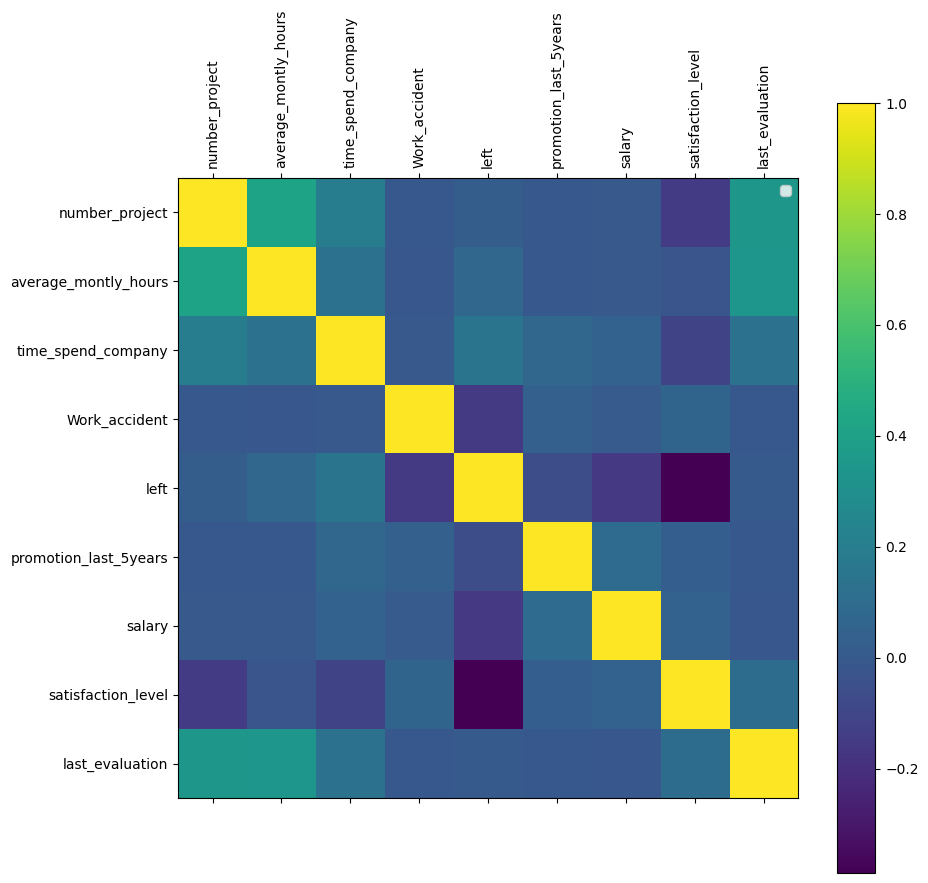

In [24]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''La función traza una matriz de correlación gráfica para cada par de columnas en el marco de datos.

     Input:
         df: marco de datos de pandas
         size: tamaño vertical y horizontal de la parcela'''
    df_corr = main_df_final.drop(columns='department')
    corr = df_corr.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(main_df_final)

## Preparar el conjunto de datos para ML

In [34]:
# Convertir en variables indicadores (dummy) las variables categóricas
dummy_df = pd.get_dummies(main_df_final, columns=['department'])
dummy_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2,157,3,0,1,0,1,0.38,0.53,False,False,False,False,False,False,False,True,False,False
1,5,262,6,0,1,0,2,0.80,0.86,False,False,False,False,False,False,False,True,False,False
2,7,272,4,0,1,0,2,0.11,0.88,False,False,False,False,False,False,False,True,False,False
3,5,223,5,0,1,0,1,0.72,0.87,False,False,False,False,False,False,False,True,False,False
4,2,159,3,0,1,0,1,0.37,0.52,False,False,False,False,False,False,False,True,False,False


In [36]:
# ¿Cuántas columnas tenemos ahora?
dummy_df.shape[1]


19

In [37]:
# ¿Cuántos empleados del conjunto de datos se han ido?
dummy_df.shape[0]

14999

In [39]:
# mostar el dataset final
dummy_df.shape

(14999, 19)

In [38]:
# Utiliza la función info() para ver a detalle el dataset
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   salary                  14999 non-null  int64  
 7   satisfaction_level      14999 non-null  float64
 8   last_evaluation         14999 non-null  float64
 9   department_IT           14999 non-null  bool   
 10  department_RandD        14999 non-null  bool   
 11  department_accounting   14999 non-null  bool   
 12  department_hr           14999 non-null  bool   
 13  department_management   14999 non-null  bool   
 14  department_marketing    14999 non-null

## Conjunto de entrenamiento y prueba

In [58]:
# importa las librerias
from sklearn.model_selection import train_test_split

# Conjunto de características de entrada (variables independientes)
X = dummy_df.drop('left', axis=1)

# Variable objetivo (variable dependiente)
y = dummy_df['left']



In [59]:
# Conjunto de entrenamiento y prueba a razón de 70:30 (Train:Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [60]:
# Normalizar los datos

# importar la libreria StandarScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [50]:
# convertir a dataframe X_train
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,satisfaction_level,last_evaluation,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,-1.455005,-1.326876,0.347839,-0.412706,-0.145616,0.637639,-0.333392,-1.159432,-0.300586,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,-0.416177,2.121259
1,0.966569,1.101252,-0.342905,-0.412706,-0.145616,0.637639,0.634409,-1.100759,-0.300586,-0.23692,4.311344,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,-0.416177,-0.471418
2,-0.647813,-1.045936,-1.033649,-0.412706,-0.145616,0.637639,1.118310,0.424745,-0.300586,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,2.402821,-0.471418
3,-0.647813,-0.905466,1.729327,2.423030,-0.145616,-0.934226,0.110184,-0.514027,-0.300586,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,-0.612613,2.402821,-0.471418
4,0.159378,-1.005802,-0.342905,-0.412706,-0.145616,0.637639,1.481235,0.131379,-0.300586,-0.23692,-0.231946,-0.23149,-0.211122,-0.246413,-0.252231,1.632352,-0.416177,-0.471418


###Construir RNA

Importar keras y librerias adicionales

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Inicializar el RNA

In [67]:
classifier = Sequential()

###Añadir las capas de entrada y primera capa oculta

In [68]:
classifier.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=18))

In [69]:
classifier.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))

In [70]:
classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

In [71]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
classifier.fit(X_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
329/329 [==============================] - 2s 2ms/step - loss: 0.3789 - accuracy: 0.8342
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9478
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1443 - accuracy: 0.9587
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1326 - accuracy: 0.9629
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9655
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1200 - accuracy: 0.9658
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9675
Epoch 8/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9669
Epoch 9/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1094 - accuracy: 0.9681
Epoch 10/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1058 - accura

### ¿Puede el aprendizaje profundo marcar la diferencia?

Puede predecir si un empleado renunciara o no y tambien podra ayudar a prediecir cuantos empleados renunciaran en el futuro entonces si puede marcar una diferencia en una empresa